In [1]:
#imports
from pathlib import Path
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import panel as pn
import plotly.express as px
import hvplot.pandas


Bad key "text.kerning_factor" on line 4 in
C:\Users\jwber\anaconda3\envs\pyvizenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
#set file path
csvpath  = Path("C:/Users/jwber/project_one/Resources/player_stats/standard_stats_top_goal.csv")

In [3]:
#open the csv path
standard_stats = pd.read_csv(csvpath, encoding = "ISO-8859-1", engine='python')
standard_stats.head()


player   nation pos            squad    born  mp  starts   min  \
0        Aaron Ramsey  wal WAL  MF          Arsenal  1990.0   7       5   354   
1         Abdul Razak   ci CIV  MF  Manchester City  1992.0   1       0     1   
2          Abou Diaby   fr FRA  MF          Arsenal  1986.0  16      13   954   
3        Adam Johnson  eng ENG  MF  Manchester City  1987.0  31      15  1542   
4  Aleksandar Kolarov   rs SRB  DF  Manchester City  1985.0  24      20  1720   

   gls  ast  pk  pkatt  crdy  crdr  gls_per_90  ast_per_90  g_plus_a_per_90  \
0    1  0.0   0    0.0     1     0        0.25        0.00             0.25   
1    0  0.0   0    0.0     0     0        0.00        0.00             0.00   
2    2  2.0   0    0.0     1     1        0.19        0.19             0.38   
3    4  4.0   0    0.0     2     0        0.23        0.23             0.47   
4    1  1.0   0    0.0     6     1        0.05        0.05             0.10   

   g_minus_pk_per_90  year   league  
0               0.25  2010  English  
1               0.00  2010  English  
2               0.19  2010  English  
3               0.23  2010  English  
4               0.05  2010  English

In [4]:
#clean data
standard_stats = standard_stats.drop(columns=['born', 'mp', 'starts', 'min'])
standard_stats.head()

player   nation pos            squad  gls  ast  pk  pkatt  \
0        Aaron Ramsey  wal WAL  MF          Arsenal    1  0.0   0    0.0   
1         Abdul Razak   ci CIV  MF  Manchester City    0  0.0   0    0.0   
2          Abou Diaby   fr FRA  MF          Arsenal    2  2.0   0    0.0   
3        Adam Johnson  eng ENG  MF  Manchester City    4  4.0   0    0.0   
4  Aleksandar Kolarov   rs SRB  DF  Manchester City    1  1.0   0    0.0   

   crdy  crdr  gls_per_90  ast_per_90  g_plus_a_per_90  g_minus_pk_per_90  \
0     1     0        0.25        0.00             0.25               0.25   
1     0     0        0.00        0.00             0.00               0.00   
2     1     1        0.19        0.19             0.38               0.19   
3     2     0        0.23        0.23             0.47               0.23   
4     6     1        0.05        0.05             0.10               0.05   

   year   league  
0  2010  English  
1  2010  English  
2  2010  English  
3  2010  English  
4  2010  English

In [5]:
#groupby
standard_stats_sq = standard_stats.groupby(['squad', 'year']).sum()
standard_stats_sq.head()

gls   ast  pk  pkatt  crdy  crdr  gls_per_90  ast_per_90  \
squad   year                                                             
Arsenal 2010   59  43.0   4    7.0    61     5        3.29        2.25   
        2011   59  48.0   2    3.0    59     4        4.02        2.36   
        2012   55  41.0   5    6.0    34     4        2.60        2.01   
        2013   60  40.0   3    3.0    46     4        4.17        2.03   
        2014   58  42.0   6    7.0    62     2        2.68        1.94   

              g_plus_a_per_90  g_minus_pk_per_90  
squad   year                                      
Arsenal 2010             5.52               3.10  
        2011             6.41               3.97  
        2012             4.62               2.45  
        2013             6.20               4.07  
        2014             4.61               2.50

In [6]:
#plot-gls
def make_plot(stats):

    varstring = stats
    fig, ax = plt.subplots(figsize=(10,15))
    standard_stats.groupby(['year', 'squad']).sum()[varstring].unstack().plot(ax=ax)
    for line in ax.get_lines():
        if line.get_label() == 'Paris S-G':
            line.set_linewidth(10)
    plt.show()

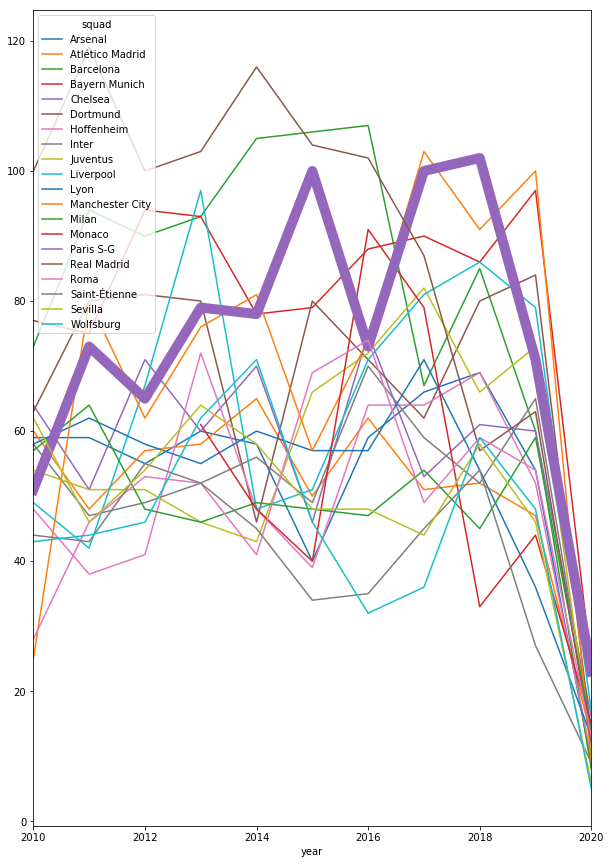

In [7]:
#plot
make_plot('gls')


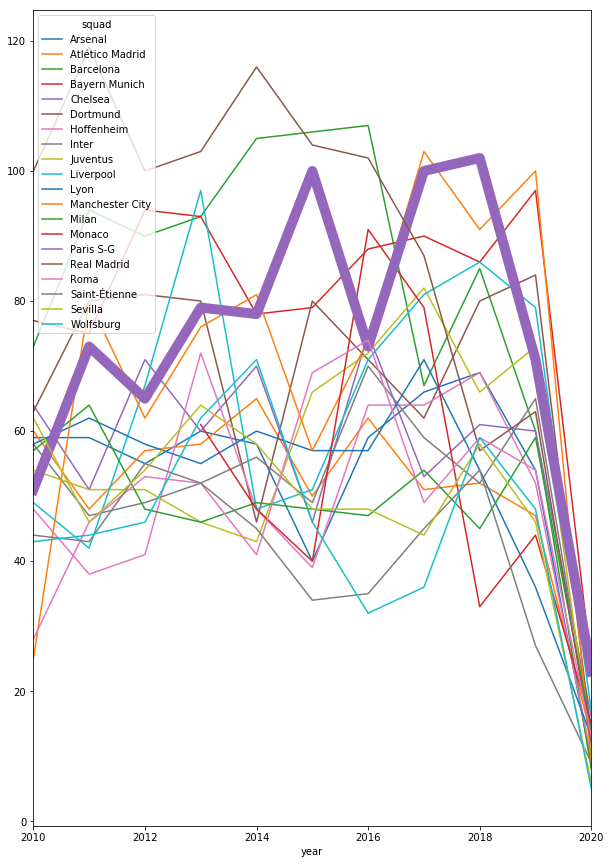

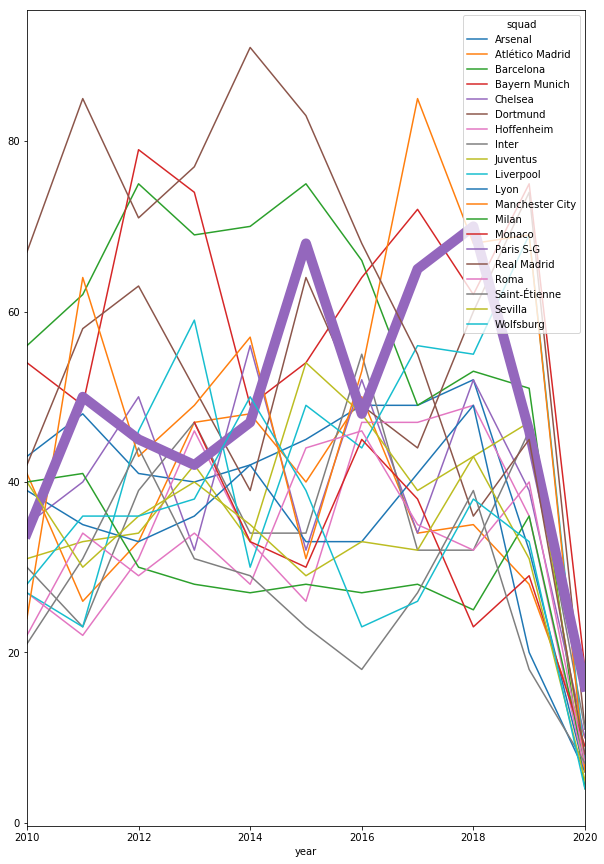

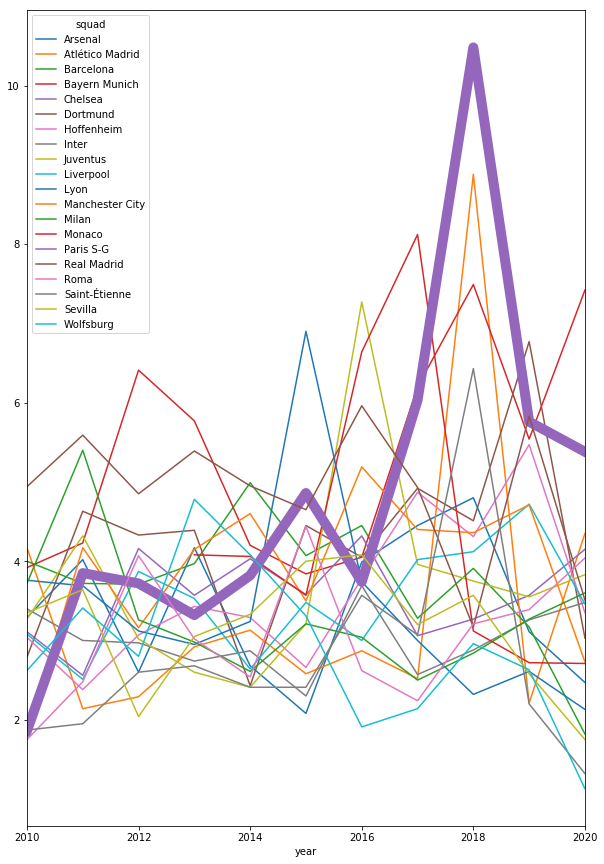

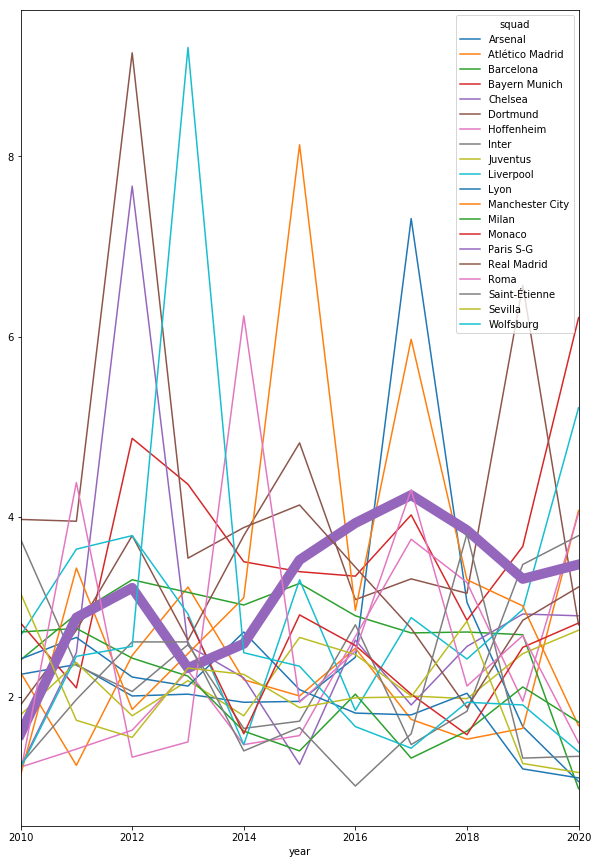

Tabs
    [0] Row
        [0] Str(None)
    [1] Row
        [0] Str(None)
    [2] Row
        [0] Str(None)
    [3] Row
        [0] Str(None)

In [8]:
#tabs
gls = pn.Row(make_plot('gls'))
ast = pn.Row(make_plot('ast'))
gls_per_90 = pn.Row(make_plot('gls_per_90'))
ast_per_90 = pn.Row(make_plot('ast_per_90'))
#plots_as_column = pn.Column(
   # "Top Team Stat Comparison", gls, ast, gls_per_90, ast_per_90
#)


tabs = pn.Tabs(
    #("All Comparison", plots_as_column)
    ("Top Teams Goal Comparison", gls),
    ("Top Teams Assists Comparison", ast),
    ("Top Teams Goals per 90 min Comparison", gls_per_90),
    ("Top Teams Assists per 90 min Comparison", ast_per_90)
)
tabs

In [9]:
#Transfer player stats
csvpath2 = Path("C:/Users/jwber/project_one/Resources/player_stats/psg_transfer_player_stats.csv")
transfer_stats = pd.read_csv(csvpath2, encoding = "ISO-8859-1", engine='python')
transfer_stats.tail()

player      squad  mp  starts   min  gls  ast  pk  pkatt  crdy  crdr  \
121  Maxwell  Paris S-G  33      33  2933    2    3   0      0     2     0   
122  Maxwell  Paris S-G  24      23  2090    3    2   0      0     2     0   
123  Maxwell  Paris S-G  26      24  2164    3    3   0      0     1     0   
124  Maxwell  Paris S-G  28      24  2226    3    3   0      0     0     0   
125  Maxwell  Paris S-G  20      19  1713    0    6   0      0     0     0   

     gls_per_90  ast_per_90  g_plus_a_per_90  g_minus_pk_per_90  year  league  \
121        0.06        0.09             0.15               0.06  2012  French   
122        0.13        0.09             0.22               0.13  2013  French   
123        0.12        0.12             0.25               0.12  2014  French   
124        0.12        0.12             0.24               0.12  2015  French   
125        0.00        0.32             0.32               0.00  2016  French   

     transfer fee  
121       3500000  
122       3500000  
123       3500000  
124       3500000  
125       3500000

In [10]:
# data cleanup
transfer_stats = transfer_stats.drop(columns=['transfer fee'])
transfer_stats = transfer_stats.drop(columns=['year'])
transfer_stats['player'] = transfer_stats['player'].astype('str')
transfer_stats = transfer_stats.sort_index()
transfer_stats.head()
FW = 1
MD = 3
DF = 2
GK = 4



In [24]:
#position = transfer_stats.get_value('player','pos_num', takeable=False)

player_stats = transfer_stats.groupby('player').sum()
player_stats

mp  starts    min  gls  ast  pk  pkatt  crdy  crdr  \
player                                                                      
Alex                   70      67   5952    6    1   0      0    10     0   
Blaise Matuidi        203     161  14542   23   14   0      0    24     1   
David Luiz             56      52   4620    3    2   0      0    10     0   
Edinson Cavani        200     171  15058  138   23  20     25    19     1   
Ezequiel Lavezzi      107      71   6061   22    5   0      0     7     1   
Giovani Lo Celso       38      19   1869    4    2   0      0     3     0   
Gonçalo Guedes          8       1    148    0    1   0      0     0     0   
Gregory van der Wiel   89      79   7096    4   11   0      0    14     1   
Grzegorz Krychowiak    11       7    659    0    0   0      0     2     0   
Javier Pastore        186     143  12516   29   43   0      0    15     0   
Jesé                   12       1    293    1    0   1      1     0     0   
Julian Draxler         95      65   5844   13   17   0      0    16     0   
Jérémy Ménez           79      64   5422   14   20   0      0    19     0   
Kylian Mbappé          82      70   6383   71   25   3      4     7     1   
Kévin Gameiro          59      34   3150   19    3   1      1     1     0   
Layvin Kurzawa         90      72   6502    9    9   0      0    13     1   
Lucas Digne            30      29   2606    0    2   0      0     4     0   
Lucas Moura           153     104   9378   34   30   4      4     9     0   
Marco Verratti          5       4    354    0    0   0      0     1     0   
Marquinhos            185     160  14843   15    4   0      0    12     1   
Maxwell               145     136  12249   12   17   0      0     5     0   
Mohamed Sissoko        25      22   1811    2    1   0      0     8     2   
Nenê                   79      75   6606   36   24  10     10    10     0   
Neymar                 56      55   4913   49   29  13     14    12     4   
Salvatore Sirigu      109     109   9752    0    0   0      0     3     0   
Serge Aurier           57      54   4851    2   10   0      0    14     2   
Thiago Motta          166     146  12466    8    9   0      0    42     4   
Thiago Silva          125     122  10453    5    2   0      0    12     0   
Yohan Cabaye           39      22   1787    1    3   0      0     9     1   
Yuri Berchiche         22      19   1715    2    3   0      0     4     0   
Zlatan Ibrahimovic    122     117  10292  113   37  24     27    20     1   
Ángel Di María        148     131  10925   48   58   1      2     7     1   

                      gls_per_90  ast_per_90  g_plus_a_per_90  \
player                                                          
Alex                        0.30        0.07             0.37   
Blaise Matuidi              0.84        0.56             1.42   
David Luiz                  0.12        0.09             0.21   
Edinson Cavani              5.60        1.01             6.60   
Ezequiel Lavezzi            1.41        0.24             1.64   
Giovani Lo Celso            0.20        0.10             0.30   
Gonçalo Guedes              0.00        0.63             0.63   
Gregory van der Wiel        0.23        0.56             0.80   
Grzegorz Krychowiak         0.00        0.00             0.00   
Javier Pastore              1.29        2.36             3.65   
Jesé                        0.34        0.00             0.34   
Julian Draxler              1.15        1.18             2.33   
Jérémy Ménez                0.71        0.84             1.55   
Kylian Mbappé               4.36        1.79             6.15   
Kévin Gameiro               1.26        0.18             1.43   
Layvin Kurzawa              0.63        0.62             1.24   
Lucas Digne                 0.00        0.14             0.14   
Lucas Moura                 2.54        2.67             5.22   
Marco Verratti              0.00        0.00             0.00   
Marquinhos                  0.85       

In [12]:
#import combined data
csvpath3 = Path("C:/Users/jwber/project_one/Resources/player_stats/player_sum_2.csv")
psg_player_stats = pd.read_csv(csvpath3, encoding = "ISO-8859-1", engine='python')
psg_player_stats.set_index(psg_player_stats['player'], inplace=True)
psg_player_stats = psg_player_stats.drop(columns=['player'])
psg_player_stats.head()


mp  starts    min  gls  ast  pk  pkatt  crdy  crdr  \
player                                                                
Ángel Di María  148     131  10925   48   58   1      2     7     1   
Alex             70      67   5952    6    1   0      0    10     0   
Blaise Matuidi  203     161  14542   23   14   0      0    24     1   
David Luiz       56      52   4620    3    2   0      0    10     0   
Edinson Cavani  200     171  15058  138   23  20     25    19     1   

                gls_per_90  ast_per_90  g_plus_a_per_90  g_minus_pk_per_90  \
player                                                                       
Ángel Di María        2.25        2.70             4.95               2.21   
Alex                  0.30        0.07             0.37               0.30   
Blaise Matuidi        0.84        0.56             1.42               0.84   
David Luiz            0.12        0.09             0.21               0.12   
Edinson Cavani        5.60        1.01             6.60               4.72   

                num_seasons  transfer_fee pos  pos_num  
player                                                  
Ángel Di María            6      63000000  FW        1  
Alex                      3       5000000  DF        1  
Blaise Matuidi            7       8000000  MF        1  
David Luiz                3      49500000  DF        2  
Edinson Cavani            7      64500000  FW        1

In [13]:
# Slice by position
fw_sts = psg_player_stats[
    psg_player_stats['pos'] == 'FW'
]

mf_sts = psg_player_stats[
    psg_player_stats['pos'] == 'MF'
]

df_sts = psg_player_stats[
    psg_player_stats['pos'] == 'DF'
]


In [25]:
#forward transfer cost
fw_transfer = (fw_sts.iloc[:, 14]) 
fw_transfer_comparison = fw_transfer.hvplot.bar(title='Forward Transfer Cost', rot=90, figsize=(10,10))


In [39]:
# forward production
fw_prod = fw_sts.iloc[:, 3] + fw_sts.iloc[:, 4]
fw_prod_comparison = fw_prod.hvplot.bar(title='Forward Goals and Assists', rot=90, figsize=(10,10))

In [40]:
#midfield transfer
mf_transfer = mf_sts.iloc[:, 14]
mf_transfer_comparison = mf_transfer.hvplot.bar(title='Midfield Transfer Cost', rot=90, figsize=(10,10))


In [41]:
#midfield production
mf_prod = mf_sts.iloc[:, 3] + mf_sts.iloc[:, 4]
mf_prod_comparison = mf_prod.hvplot.bar(title='Midfield Goals and Assists', rot=90, figsize=(10,10))

In [42]:
# Transfer comparison
mf_vs_fw_cost = mf_transfer.hvplot.bar(label='Midfield Transfer Cost',rot=90) * fw_transfer.hvplot.bar(label='Forward Transfer Cost', rot=90)

In [45]:
#production comparison
mf_vs_fw_prod = mf_prod.hvplot.bar(label='Midfield G and A',rot=90) * fw_prod.hvplot.bar(label='Forward G and A',rot=90)

In [46]:
#panel
row_fw = pn.Row(fw_transfer_comparison)
row_fw.append(fw_prod_comparison)
row_mf = pn.Row(mf_transfer_comparison)
row_mf.append(mf_prod_comparison)
row_fw_vs_mf = pn.Row(mf_vs_fw_cost)
row_fw_vs_mf.append(mf_vs_fw_prod)

column = pn.Column('# Player Cost Beneft Analysis By Player and Position',row_fw, row_mf, row_fw_vs_mf)




tabs = pn.Tabs(
    ("all Plots", column),
    ("Forward Cost and Production", row_fw),
    ("Midfield Cost and Production", row_mf),
    ("Forward Vs. Midfield Cost and Production", row_fw_vs_mf)
)

tabs

Tabs
    [0] Column
        [0] Markdown(str)
        [1] Row
            [0] HoloViews(Bars)
            [1] HoloViews(Bars)
        [2] Row
            [0] HoloViews(Bars)
            [1] HoloViews(Bars)
        [3] Row
            [0] HoloViews(Overlay)
            [1] HoloViews(Overlay)
    [1] Row
        [0] HoloViews(Bars)
        [1] HoloViews(Bars)
    [2] Row
        [0] HoloViews(Bars)
        [1] HoloViews(Bars)
    [3] Row
        [0] HoloViews(Overlay)
        [1] HoloViews(Overlay)